# Plots of CCLM domains

In [14]:
import xarray as xr
import matplotlib.pyplot as plt
import valenspy as vp
from valenspy.diagnostic_visualizations import plot_map
import cartopy.crs as ccrs
import cartopy
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.ticker as mticker
from cartopy.mpl.gridliner import LONGITUDE_FORMATTER, LATITUDE_FORMATTER



In [15]:
# define machine name - used for paths of (observational) datasets
machine = 'hortense'

# reference dataset to compare to
model = 'CCLM'
variable =  'tas'

manager = vp.InputManager(machine=machine)

# load data
ds_cpm = manager.load_data(model, [variable], freq="daily", path_identifiers=["BE28_Nukleus", "mean"])
ds_eur11 = manager.load_data(model, [variable], freq="daily", path_identifiers=["EUR11_NU_TT_EC_TSO", "mean"])

da_eur11 = ds_eur11['tas'].mean('time')
da_cpm = ds_cpm['tas'].mean('time')

File paths found:
/dodrio/scratch/projects/2022_200/project_output/rcs/CORDEXBE2/postprocessing/BE28_Nukleus/T_2M/daily/T_2M_daymean.nc
Variable metadata is missing or incorrect
The file is NOT ValEnsPy CF compliant.
33.33% of the variables are ValEnsPy CF compliant
ValEnsPy CF compliant: ['tas']
Unknown to ValEnsPy: ['time_bnds', 'rotated_pole']
File paths found:
/dodrio/scratch/projects/2022_200/project_output/rcs/CORDEXBE2/postprocessing/EUR11_NU_TT_EC_TSO/T_2M/daily/T_2M_daymean.nc
Variable metadata is missing or incorrect
The file is NOT ValEnsPy CF compliant.
33.33% of the variables are ValEnsPy CF compliant
ValEnsPy CF compliant: ['tas']
Unknown to ValEnsPy: ['time_bnds', 'rotated_pole']


/dodrio/scratch/projects/2022_200/project_output/rcs/software/miniconda3/envs/valenspy_dev/lib/python3.9/site-packages/cartopy/mpl/feature_artist.py:144: UserWarning: facecolor will have no effect as it has been defined as "never".
  warnings.warn('facecolor will have no effect as it has been '
/dodrio/scratch/projects/2022_200/project_output/rcs/software/miniconda3/envs/valenspy_dev/lib/python3.9/site-packages/cartopy/mpl/feature_artist.py:144: UserWarning: facecolor will have no effect as it has been defined as "never".
  warnings.warn('facecolor will have no effect as it has been '


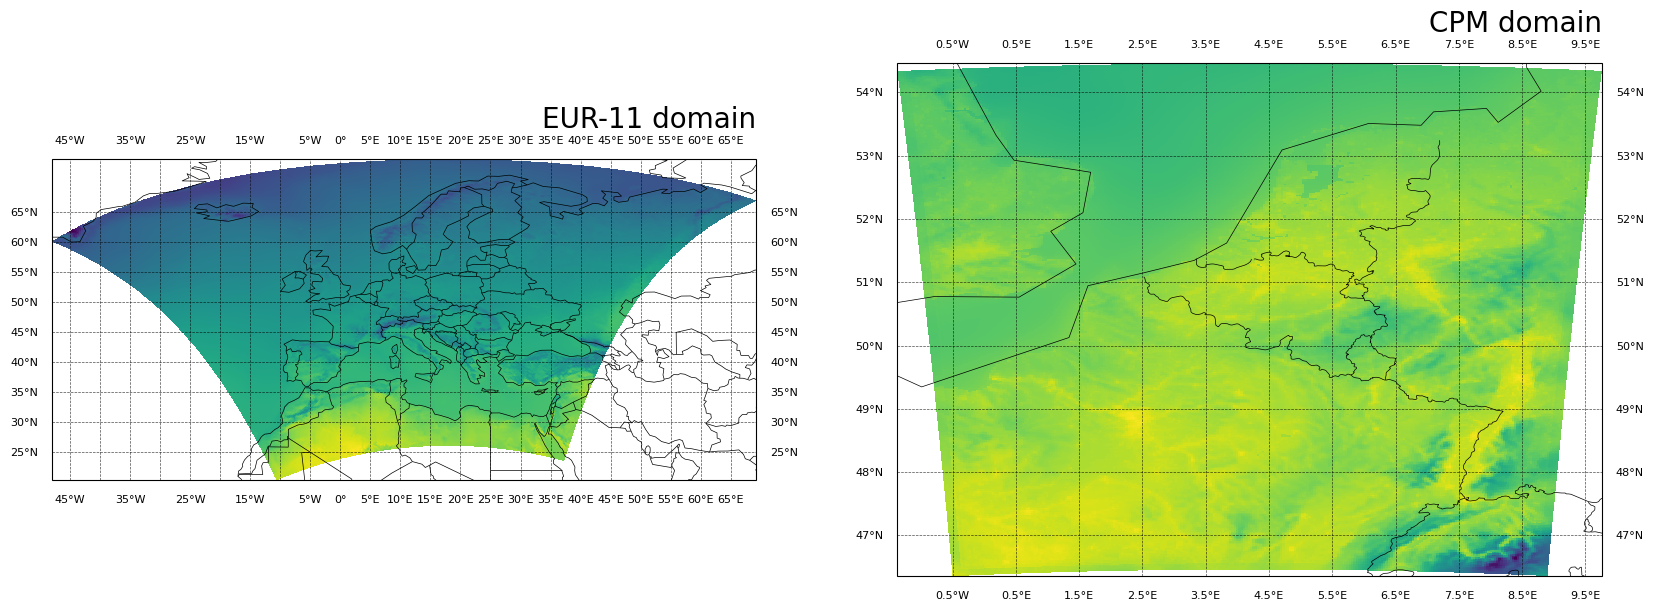

In [21]:
pc = ccrs.PlateCarree() # Plate Carree projection for the gridlines
coastlines = cartopy.feature.NaturalEarthFeature('physical', 'coastline',scale='110m',edgecolor = 'black', facecolor='none')
borders = cartopy.feature.BORDERS

fig = plt.figure(figsize = (20,14))

ax1 = fig.add_subplot(1,2,1,projection=ccrs.PlateCarree())
xcoords = np.arange(-50,70,5)
ycoords = np.arange(-30,70,5)

# Plotting maps
plt.title('EUR-11 domain', fontsize = 20,  loc="right")
ax1.add_feature(coastlines,linewidth = 0.5,zorder=10)
ax1.add_feature(borders,linewidth = 0.5,zorder=10, color = "black")
gl = ax1.gridlines(draw_labels=True,x_inline=False,y_inline=False, linewidth=0.5, color='black', alpha=0.7, linestyle = '--')  
gl.xlocator = mticker.FixedLocator(xcoords) # meridians
gl.xformatter = LONGITUDE_FORMATTER
gl.ylocator = mticker.FixedLocator(ycoords)
gl.yformatter = LATITUDE_FORMATTER
gl.xlabel_style = gl.ylabel_style = {'size': 8}
gl.xpadding = gl.ypadding = 10

#var_data1 = np.array(data1.get(variable))


ax1.pcolormesh(da_eur11["lon"], da_eur11["lat"], da_eur11.values, cmap = 'viridis') #, vmin = vmin, vmax = vmax)


ax2 = fig.add_subplot(1,2,2,projection=ccrs.PlateCarree())

xcoords = np.arange(-0.5,11,1)
ycoords = np.arange(46,55,1)

# Plotting maps
plt.title('CPM domain', fontsize = 20, loc="right")
ax2.add_feature(coastlines,linewidth = 0.5,zorder=10)
ax2.add_feature(borders,linewidth = 0.5,zorder=10, color = "black")
ax2.pcolormesh(da_cpm["lon"], da_cpm["lat"], da_cpm.values, cmap = 'viridis', zorder=1) #, vmin = vmin, vmax = vmax)

gl2 = ax2.gridlines(draw_labels=True,x_inline=False,y_inline=False, linewidth=0.5, color='black', alpha=0.7, linestyle = '--', zorder=2)  
gl2.xlocator = mticker.FixedLocator(xcoords) # meridians
gl2.xformatter = LONGITUDE_FORMATTER
gl2.ylocator = mticker.FixedLocator(ycoords)
gl2.yformatter = LATITUDE_FORMATTER
gl2.xlabel_style = gl2.ylabel_style = {'size': 8}
gl2.xpadding = gl2.ypadding = 10


fig.show()


In [18]:
da_cpm["lon"].values

array([[-0.48321378, -0.44714266, -0.4110694 , ...,  8.811474  ,
         8.847551  ,  8.883627  ],
       [-0.48552072, -0.44943205, -0.41334125, ...,  8.81371   ,
         8.849805  ,  8.885898  ],
       [-0.48782972, -0.45172355, -0.41561517, ...,  8.815948  ,
         8.85206   ,  8.888171  ],
       ...,
       [-1.3443024 , -1.3017039 , -1.2591017 , ...,  9.646182  ,
         9.688792  ,  9.731398  ],
       [-1.3475245 , -1.3049017 , -1.2622751 , ...,  9.649305  ,
         9.69194   ,  9.7345705 ],
       [-1.3507506 , -1.3081034 , -1.2654524 , ...,  9.652433  ,
         9.695092  ,  9.737746  ]], dtype=float32)

In [19]:
da_cpm["lat"].values

array([[46.370296, 46.37188 , 46.373447, ..., 46.37661 , 46.375065,
        46.37351 ],
       [46.39525 , 46.396828, 46.3984  , ..., 46.40156 , 46.400017,
        46.39846 ],
       [46.420197, 46.42178 , 46.423347, ..., 46.426514, 46.42497 ,
        46.423412],
       ...,
       [54.276367, 54.278236, 54.28009 , ..., 54.28383 , 54.282005,
        54.280167],
       [54.301296, 54.30317 , 54.305023, ..., 54.308765, 54.30694 ,
        54.305096],
       [54.326225, 54.3281  , 54.329952, ..., 54.3337  , 54.33187 ,
        54.33003 ]], dtype=float32)